###*Read the Dataset*

In [ ]:
import pandas as pd
df=pd.read_excel(r'/content/istambul_stock_exchange.xlsx')
df.head()

,date,ISE,ISED,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


###*DETECTING TREND*

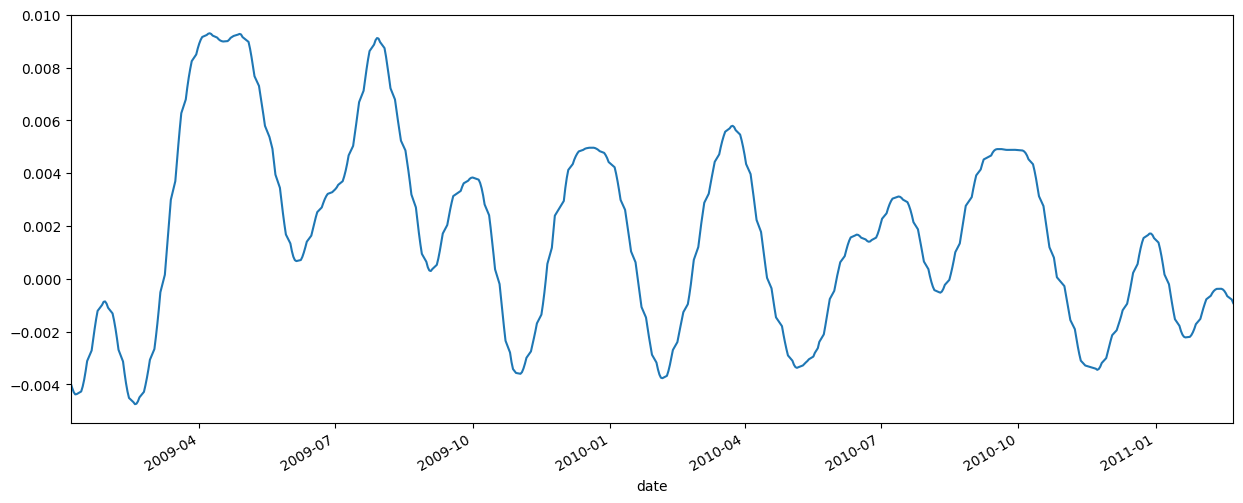

In [ ]:
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
df = pd.read_excel(r'/content/istambul_stock_exchange.xlsx',
index_col=0,parse_dates=True)
ISE_cycle,ISE_trend = hpfilter(df['ISE'], lamb=1600)
ISE_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

#*ANALYSIS OF ABOVE TIME SERIES GRAPH*

1. Time Frame:
The x-axis represents the time (date) ranging from early 2009 to early 2011.
The y-axis represents the magnitude of the variable being plotted, which appears to oscillate around zero.
2. Cyclic Patterns:
The data exhibits a clear cyclical pattern, with peaks and troughs repeating approximately every few months.
The cycles seem to occur roughly every 3 to 4 months, indicating a quarterly or seasonal trend.
3. Amplitude:
The amplitude of the cycles, or the distance between the peaks and troughs, varies slightly but remains generally consistent.
The maximum positive value reaches approximately 0.010, and the minimum negative value reaches about -0.004.
4. Trend:
There doesn’t appear to be a strong overall upward or downward trend across the time series. The data oscillates around a mean close to zero, suggesting a stable or stationary process.
5. Seasonality:
The pattern repeats over time, suggesting seasonality or a repetitive event. This might be indicative of a natural seasonal pattern, economic cycle, or another periodic phenomenon.

###*Detrending the Trend(Pandas Differencing)*

In [ ]:
!pip install datetime

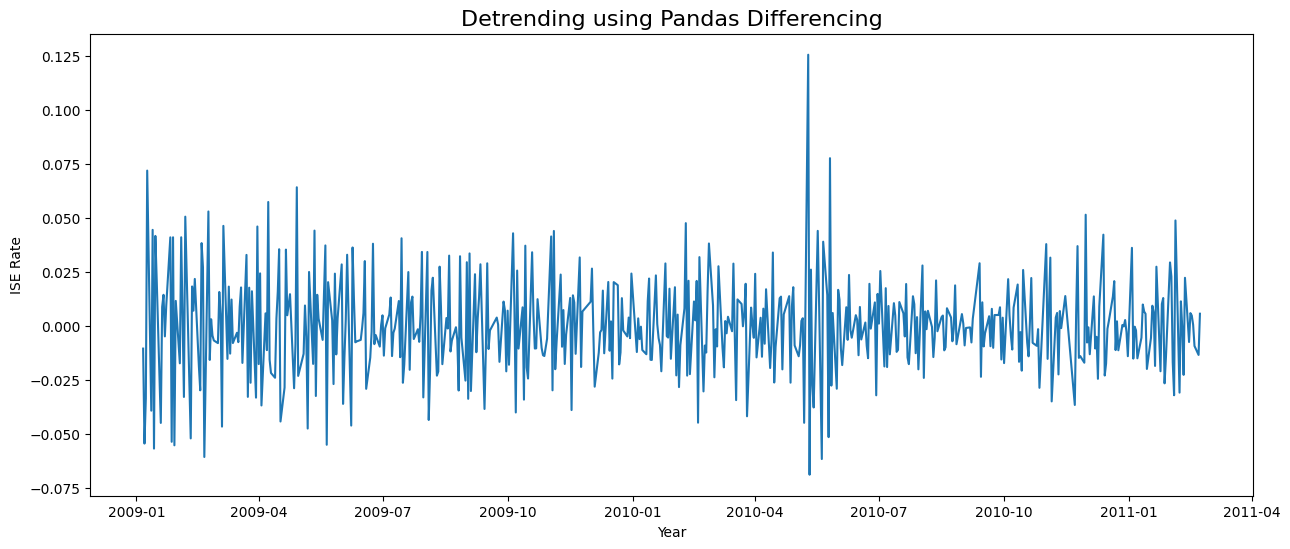

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/istambul_stock_exchange.xlsx',
index_col=0,parse_dates=True)
diff = df.ISE.diff()
plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Pandas Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('ISE Rate')
plt.show()

###*ANALYSIS OF ABOVE DETRENDING TIME SERIES GRAPH ( PANDAS DIFFERENCING)*
1. Purpose of Detrending:
The graph shows the residuals of the original time series after the trend component has been removed, highlighting the random fluctuations and cyclical patterns.
2. Data Characteristics:
The values fluctuate around zero, indicating that any long-term trends have been successfully removed, leaving behind the stationary component of the time series.
There are periods of higher volatility, particularly around mid-2009 and mid-2010, where the values show significant spikes.
3. Volatility:
The spikes represent sudden changes or anomalies in the data, with the highest peaks reaching above 0.10 and the lowest troughs dropping below -0.05.
The overall variability seems to decrease slightly over time, with fewer extreme spikes in the latter part of the graph.
4. Insights:
This detrended series is now more suitable for further analysis, such as identifying the seasonal component or applying ARIMA models for forecasting.
The presence of spikes suggests that while the trend is removed, the data still contains significant short-term variations or irregular events.

##*Detrending Trend(Scipy Signal)*

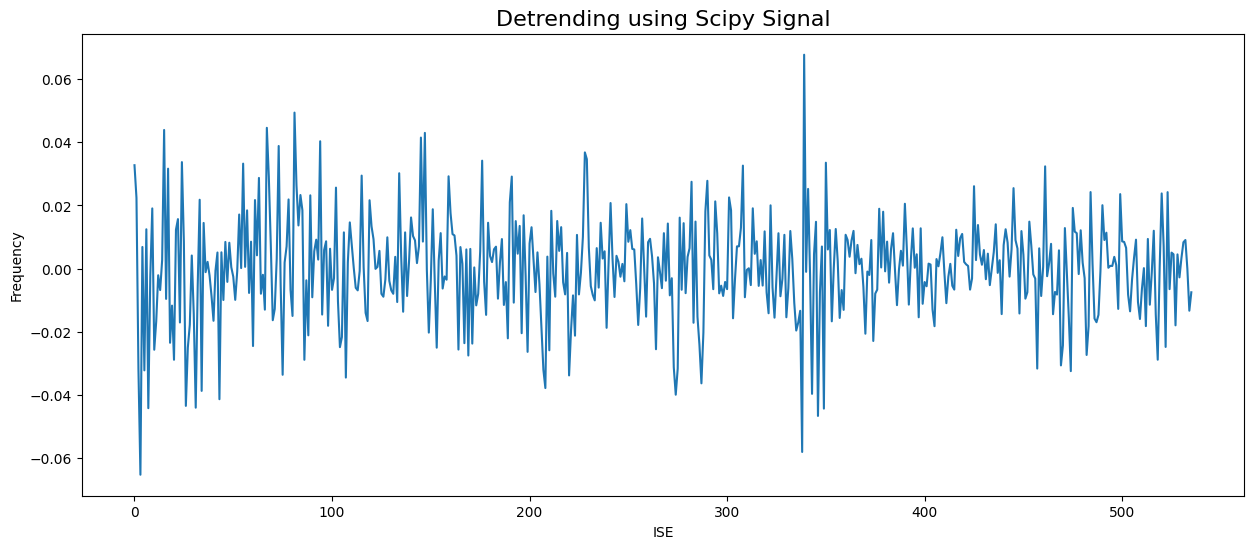

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/istambul_stock_exchange.xlsx',
index_col=0,parse_dates=True)
detrended = signal.detrend(df.ISE.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('ISE')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

###*ANALYSIS OF DETRENDING TIME SERIES GRAPH ( Sci-py Signal)*

1. Detrending Method:
The graph shows the residuals after removing the trend component using a Scipy signal processing technique, likely involving a filter to smooth out long-term trends.
2. Stationarity:
The data fluctuates around zero, indicating that the trend has been effectively removed. This suggests that the series is now stationary, meaning its statistical properties (mean, variance) are consistent over time.
3. Volatility:
The plot displays significant fluctuations throughout, with some pronounced spikes, particularly near the middle of the series.
The spikes indicate moments of higher volatility or sudden changes in the data, with values reaching as high as 0.06 and as low as -0.06.
4. Comparison to Other Methods:
Compared to the previous graph using Pandas differencing, the data here appears to have a similar level of noise, though the peaks and troughs may differ slightly, reflecting the different approaches to detrending.
5. Insights:
The detrended data is now better suited for further analysis, such as identifying cyclical patterns, seasonal components, or applying predictive models that require stationary data.
The presence of spikes suggests that there may still be short-term variations or external factors affecting the series, even after removing the trend.

##*Detrending Trend(Using HP filter)*

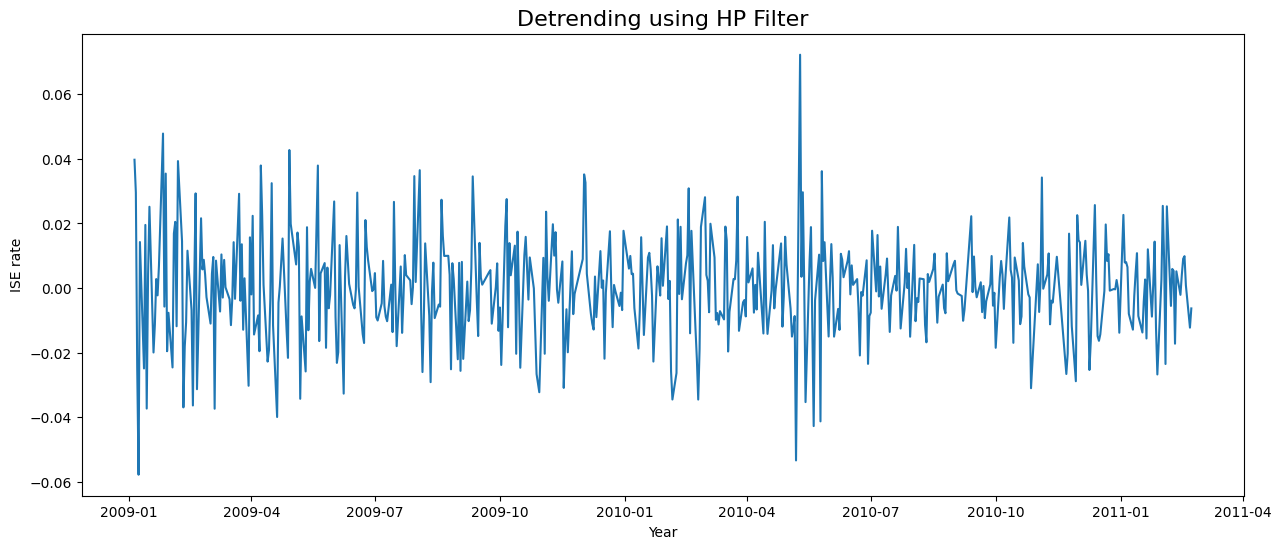

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df =pd.read_excel(r'/content/istambul_stock_exchange.xlsx',index_col=0,parse_dates=True)
ISE_cycle,ISE_trend = hpfilter(df['ISE'], lamb=1600)
df['trend'] = ISE_trend
detrended = df.ISE - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('ISE rate')
plt.show()

###*ANALYSIS OF DETRENDING TIME SERIES GRAPH (HP Filtering)*

1.Detrending Method:

The Hodrick-Prescott (HP) filter has been applied to remove the long-term trend from the original data.
The graph displays the residuals, which represent the cyclical component of the time series.

2.Stationarity:
The data oscillates around zero, indicating that the HP filter effectively removed the trend component.
This suggests that the series is now stationary, meaning its statistical properties (mean, variance) are consistent over time.

3.Volatility:
The data exhibits significant fluctuations with noticeable spikes, particularly around the middle of the series.
These spikes represent periods of higher volatility or abrupt changes in the underlying data.

4.Key Observations:
The HP filter has successfully isolated the cyclical component of the time series.
The presence of volatility suggests that the data is influenced by short-term factors or cyclical patterns.
Further analysis is required to understand the nature of these cyclical fluctuations and their potential implications.